# Pymaceuticals Inc.
---

### Analysis

- This project is designed to delve into the effectiveness of various cancer treatment regimens using mouse models. The primary focus is to understand how different treatments impact tumor growth and response over time. 

The analysis involves a detailed examination of tumor volumes, which provides valuable insights into how the tumor responds to each treatment regimen. This includes observing the changes in tumor size over time, and how these changes vary between different treatments. 

The use of visualizations plays a crucial role in this analysis. Graphical representations such as line plots, box plots, and scatter plots are generated to help visualize the data. These visualizations make it easier to identify patterns, trends, and outliers in the data, which might not be immediately apparent from the raw data.

Furthermore, statistical analyses, including the calculation of correlation coefficients and linear regression models, are performed to understand the relationship between variables, such as mouse weight and tumor volume. This can help identify whether there are any significant associations that could be of interest for further research.

The findings from this analysis can be leveraged to guide future research in cancer treatment. By identifying which treatments are most effective in reducing tumor volume, researchers can focus on improving these treatments or exploring why these treatments are more effective. This could potentially lead to the development of more effective cancer treatments and improve the prognosis for cancer patients.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
merged_df.head()

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].nunique()
num_mice


249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
# Find all data for the duplicate mice
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Get the data for the duplicate mice
duplicate_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)]

# Display the data for the duplicate mice
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_df = merged_df[~merged_df["Mouse ID"].isin(duplicate_mice)]

# Display the clean DataFrame
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = clean_df["Mouse ID"].nunique()

num_unique_mice

248

## Summary Statistics

In [11]:
# The goal is to generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.

# Start by grouping the clean DataFrame by the 'Drug Regimen' column.
grouped_df = clean_df.groupby("Drug Regimen")

# For each drug regimen, calculate the mean, median, variance, standard deviation, 
# and SEM of the tumor volume.
mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
std_dev = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()

# Combine the calculated series into a single DataFrame for easy analysis and visualization.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.": sem
})

# Display the summary DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Column Name Cleanup
summary_statistics = summary_statistics.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})

# Print the summary statistics table
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

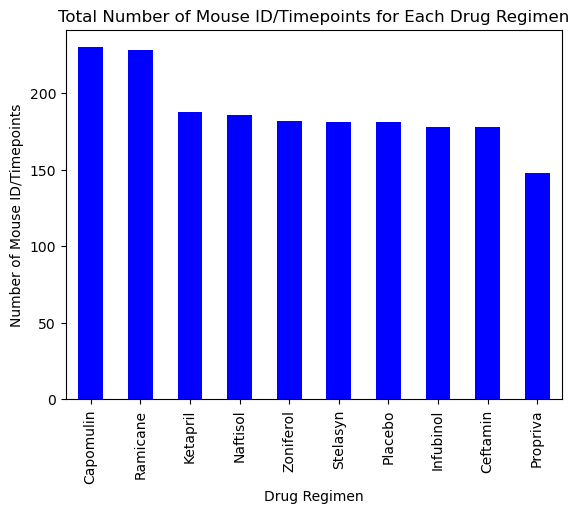

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the clean DataFrame by the 'Drug Regimen' column
counts = clean_df["Drug Regimen"].value_counts()

# Create a bar chart based off of the group series from before
counts.plot(kind="bar", color="blue")

# Set the xlabel and ylabel using class methods
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

# Show the plot
plt.show()

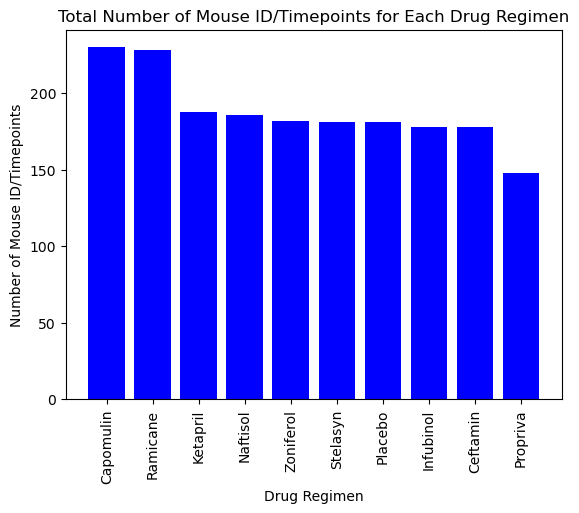

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Build a dataframe with the total number of Mouse ID/Timepoints for each drug regimen
drug_counts = clean_df["Drug Regimen"].value_counts()

# Create a bar plot using the Pyplot bar() function
plt.bar(drug_counts.index, drug_counts.values, color="blue")

# Set the title and labels
plt.title("Total Number of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

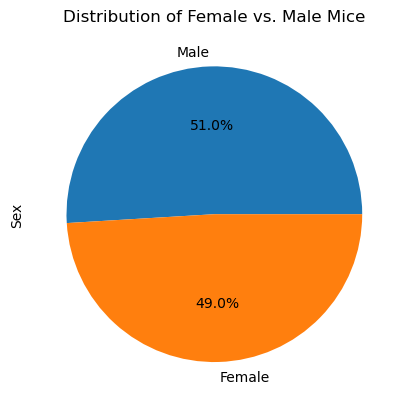

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of occurrences for each gender in the 'Sex' column of the DataFrame
gender_counts = clean_df["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice
# 'autopct' is used to format the value of each label as a percentage
pie_plot = gender_counts.plot(kind="pie", autopct="%1.1f%%")

# Set the title of the pie plot
pie_plot.set_title("Distribution of Female vs. Male Mice")

# Add y-axis label
plt.ylabel("Sex")

# Display the plot
plt.show()

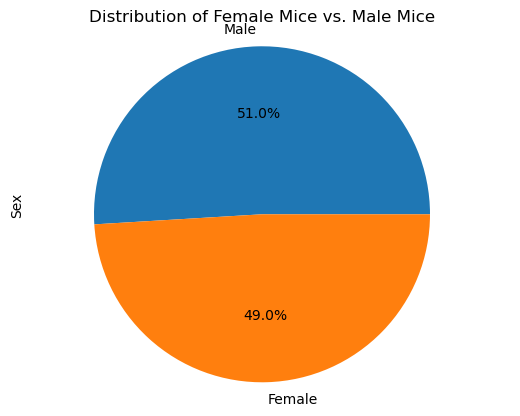

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of occurrences for each gender in the 'Sex' column of the DataFrame
gender_counts = clean_df["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice
# 'autopct' is used to format the value of each label as a percentage
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")

# Set the title of the pie plot
plt.title("Distribution of Female Mice vs. Male Mice")

# Add "Sex" text to the plot
plt.text(-1.5, 0, 'Sex', rotation=90)

# Ensure the pie chart is a circle rather than an ellipse
plt.axis('equal')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculate the last (greatest) timepoint for each mouse
# Define the treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
max_timepoints = merged_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this with the original dataframe to get the tumor volume at the last timepoint
merged_final_df = pd.merge(max_timepoints, merged_df, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the dataframe to include only the specified treatment regimens
final_tumor_volume_df = merged_final_df[merged_final_df['Drug Regimen'].isin(treatment_regimens)]

# Select only necessary columns
final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Display the final dataframe
final_tumor_volume_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,31.896238
241,y865,Ceftamin,64.729837
245,z578,Ramicane,30.638696


In [32]:


# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vols.append(final_tumor_vol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers.to_string() if not outliers.empty else 'Series([], Name: Tumor Volume (mm3), dtype: float64)'}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


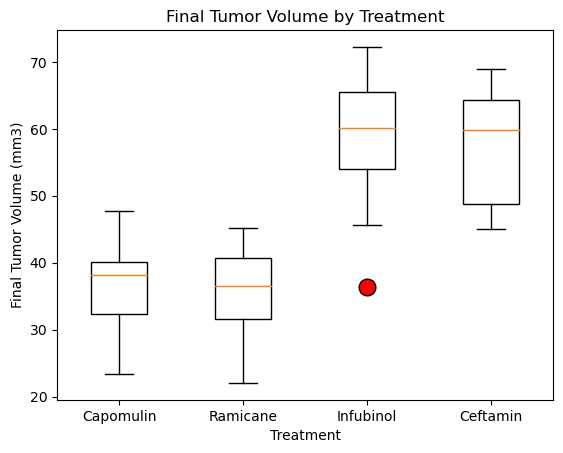

In [38]:


# Generate a box plot that shows the distribution of tumor volumes for each treatment regimen
tumor_vols_data = [vol.dropna() for vol in tumor_vols]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Treatment')
ax1.set_xlabel('Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')

# Create the boxplot and set the outlier properties
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none')
bp = ax1.boxplot(tumor_vols_data, labels=treatments, patch_artist=True, flierprops=flierprops)

# Change the facecolor of each box
for box in bp['boxes']:
    box.set(facecolor='white')

plt.show()



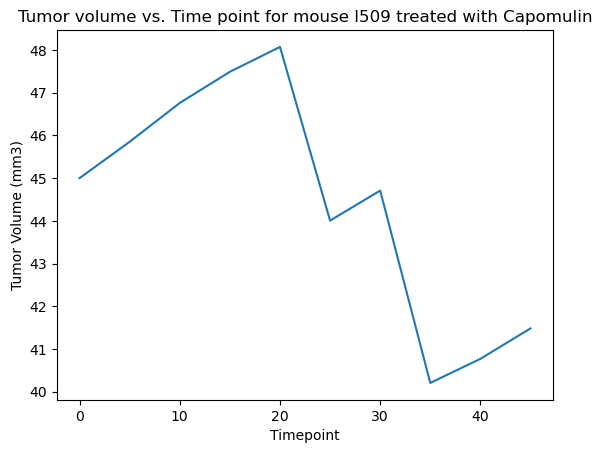

In [44]:
mouse_data = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'l509'), ['Timepoint', 'Tumor Volume (mm3)']]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor volume vs. Time point for mouse l509 treated with Capomulin')
plt.show()

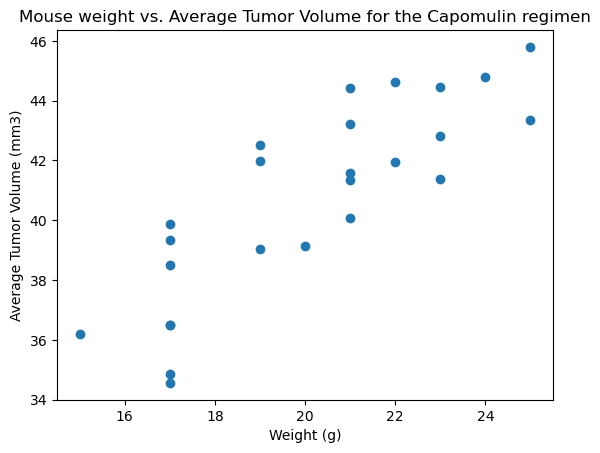

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the weight of each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs. Average Tumor Volume for the Capomulin regimen')
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


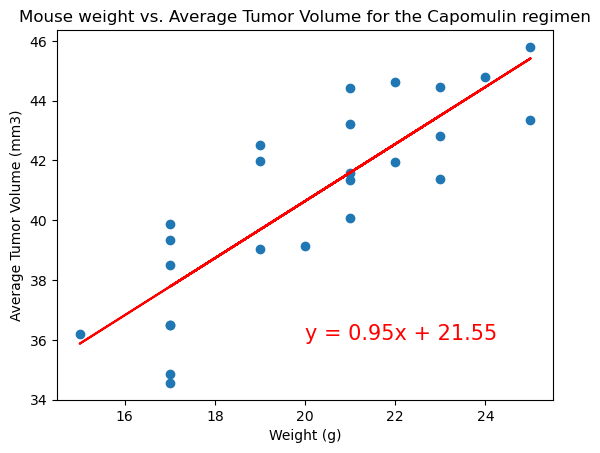

In [62]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen.


import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the weight of each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Calculate the correlation coefficient
correlation = round(pearsonr(mouse_weight, average_tumor_volume)[0], 2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")


# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse weight vs. Average Tumor Volume for the Capomulin regimen')

# Plot the linear regression model
plt.plot(mouse_weight, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.show()


